<a href="https://colab.research.google.com/github/juanpazmino/Bit-Prediction/blob/main/Copia_de_BitCoin_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
import time
import itertools
import warnings
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Data


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Tensor Projects/Machine Learning R_27.07.21/Machine Learning Project 2 - Bitcoin Price Prediction/bitcoin.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    367 non-null    object 
 1   Price   367 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.9+ KB


#date as a date

In [ ]:
df.columns = df.columns.str.replace(' ', '')

In [ ]:
df.head()

,Date,Price
0,5/23/2019,7881.846680
1,5/24/2019,7987.371582
2,5/25/2019,8052.543945
3,5/26/2019,8673.215820
4,5/27/2019,8805.778320


In [ ]:
df['Date']=pd.to_datetime(df["Date"], format = "%m/%d/%Y")

In [ ]:
df['Date'].min()

Timestamp('2019-05-23 00:00:00')

In [ ]:
df['Date'].max()

Timestamp('2020-05-23 00:00:00')

In [ ]:
df=df.set_index('Date')

#Groupby

In [ ]:
df = df.groupby('Date')[['Price']].sum().reset_index() #evitamos valores duplicados

In [ ]:
df.nunique()

Date     367
Price    367
dtype: int64

In [ ]:
df[(df['Date'].dt.year == 2020) & (df['Date'].dt.month == 5)]

,Date,Price
344,2020-05-01,8864.766602
345,2020-05-02,8988.596680
346,2020-05-03,8897.468750
347,2020-05-04,8912.654297
348,2020-05-05,9003.070313
349,2020-05-06,9268.761719
350,2020-05-07,9951.518555
351,2020-05-08,9842.666016
352,2020-05-09,9593.896484
353,2020-05-10,8756.430664


In [ ]:
df = df.set_index('Date')

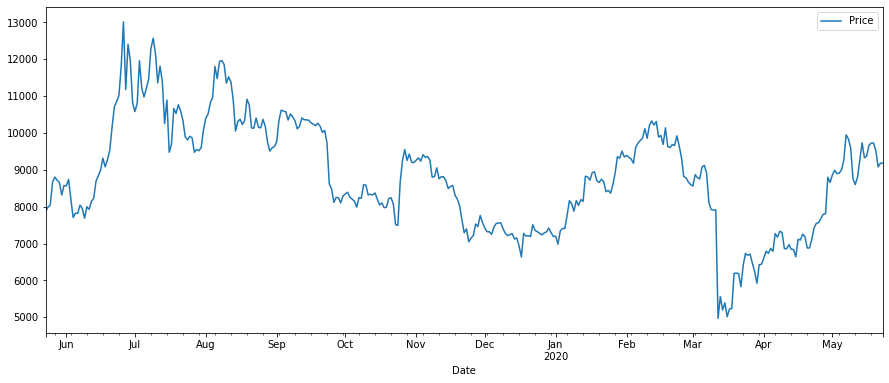

In [ ]:
df.plot(figsize=(15, 6))
plt.show()

#Generamos Lags


In [ ]:
df['Lag1'] = df['Price'].shift(1)
df['Lag2'] = df['Price'].shift(2)
df['Lag3'] = df['Price'].shift(3)
df.head()

,Price,Lag1,Lag2,Lag3
Date,,,,
2019-05-23,7881.846680,NaN,NaN,NaN
2019-05-24,7987.371582,7881.846680,NaN,NaN
2019-05-25,8052.543945,7987.371582,7881.846680,NaN
2019-05-26,8673.215820,8052.543945,7987.371582,7881.846680
2019-05-27,8805.778320,8673.215820,8052.543945,7987.371582


#Generamos MAs


In [ ]:
df['MA_3']= df['Price'].rolling(window=3).mean()
df['MA_4']= df['Price'].rolling(window=4).mean()
df['MA_5']= df['Price'].rolling(window=5).mean()
df.head()

,Price,Lag1,Lag2,Lag3,MA_3,MA_4,MA_5
Date,,,,,,,
2019-05-23,7881.846680,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-24,7987.371582,7881.846680,NaN,NaN,NaN,NaN,NaN
2019-05-25,8052.543945,7987.371582,7881.846680,NaN,7973.920736,NaN,NaN
2019-05-26,8673.215820,8052.543945,7987.371582,7881.846680,8237.710449,8148.744507,NaN
2019-05-27,8805.778320,8673.215820,8052.543945,7987.371582,8510.512695,8379.727417,8280.151269


In [ ]:
(8673.215820+7987.371582+8052.543945)/3

8237.710449

#Grafico Corr

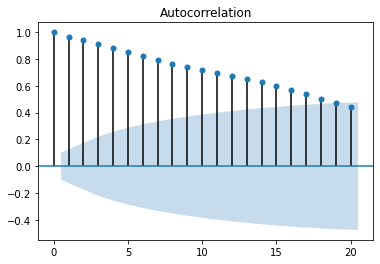

In [ ]:
LAGS=20
plot_acf(x= df['Price'],lags=LAGS);

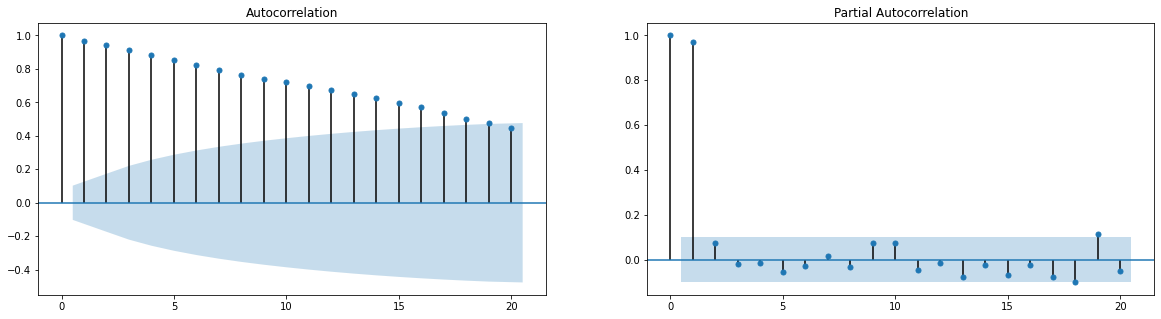

In [ ]:
fig= plt.figure(figsize=(20,5))

ax1,ax2 = fig.subplots(1,2)

LAGS= 20

plot_acf(x= df['Price'],lags=LAGS, ax=ax1)
plot_pacf(x= df['Price'],lags=LAGS, ax=ax2);

In [ ]:
result = adfuller(x= df['Price'])

In [ ]:
result[1] ## si es inferior a 0.05 es pi value indica que es una serie estacionaria

0.12123781073112527

#Split Train and Test

In [ ]:
df['Price'].head()

Date
2019-05-23    7881.846680
2019-05-24    7987.371582
2019-05-25    8052.543945
2019-05-26    8673.215820
2019-05-27    8805.778320
Name: Price, dtype: float64

In [ ]:
serie_predecir = df['Price']

In [ ]:
'''y_index = serie_predecir.index

date_train = int(len(y_index)*0.8)
'''

In [ ]:
'''serie_train = serie_predecir[y_index[:date_train]]
serie_test = serie_predecir[y_index[date_train:len(y_index)]]''' #--> no separo por la poca cantidad de datos

In [ ]:
#serie_train.tail()

Date
2020-03-06    9122.545898
2020-03-07    8909.954102
2020-03-08    8108.116211
2020-03-09    7923.644531
2020-03-10    7909.729492
Name: Price, dtype: float64

In [ ]:
#serie_test.head()

Date
2020-03-11    7911.430176
2020-03-12    4970.788086
2020-03-13    5563.707031
2020-03-14    5200.366211
2020-03-15    5392.314941
Name: Price, dtype: float64

#ARIMA Train 2

In [ ]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

In [ ]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
st = time.time()

best_score = 0
best_params = None
best_seasonal_params = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            
            mod = sm.tsa.statespace.SARIMAX(serie_predecir,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity = False,
                                            enforce_invertibility = False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            # guardamos el mejor resultado
            if best_score == 0:
                best_score = results.aic
                best_params = param
                best_seasonal_params = param_seasonal
                
            elif abs(results.aic) < abs(best_score):
                best_score = results.aic
                best_params = param
                best_seasonal_params = param_seasonal
            
        # alguna combinación de parámetros en SARIMAX, no son válidos
        # y los vamos a cazar con un except
        except:
            continue

et = time.time()

print("La búsqueda de parámetros no ha llevado {} minutos!".format((et - st)/60))

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7700.388329365385
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:7051.758684717114
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:6518.695849286727
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:6031.240936284854
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:5837.063496525398
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:5569.35181637504
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:6079.91798369523
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:5717.744014361133
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:5465.431074379874
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:6048.693254833153
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:6037.604627507413
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:5840.40752222926
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:5854.210819628951
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:5797.877248098415
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:5549.022501378957
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:5788.226572464091
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:5713.636035715486
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:5434.686552398144
ARIMA(0, 0, 0

In [ ]:
print("El mejor modelo es {} {} \nCon un AIC de {}".format(best_params,best_seasonal_params, best_score))

El mejor modelo es (0, 2, 2) (0, 2, 2, 12) 
Con un AIC de 4684.0320575567885


#Fitting Arima


In [ ]:
mod = sm.tsa.statespace.SARIMAX(serie_predecir,
                                order = (0,2,2),
                                seasonal_order = (0,2,2,12),
                                enforce_stationarity = False,
                                enforce_invertibility = False)

results = mod.fit()

In [ ]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                  367
Model:             SARIMAX(0, 2, 2)x(0, 2, 2, 12)   Log Likelihood               -2337.016
Date:                            Thu, 01 Sep 2022   AIC                           4684.032
Time:                                    11:23:22   BIC                           4702.779
Sample:                                05-23-2019   HQIC                          4691.523
                                     - 05-23-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0393      1.349     -0.770      0.441      -3.684       1.606
ma.L2          0.0391      0.084   

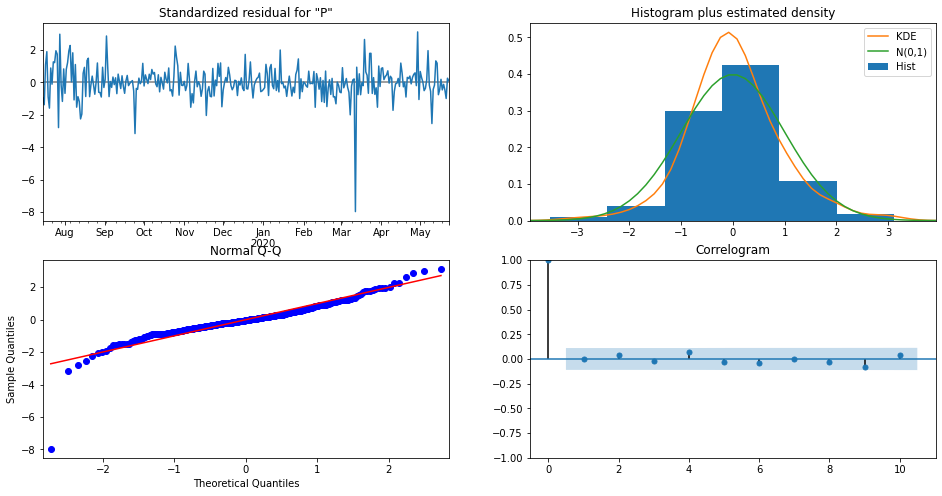

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

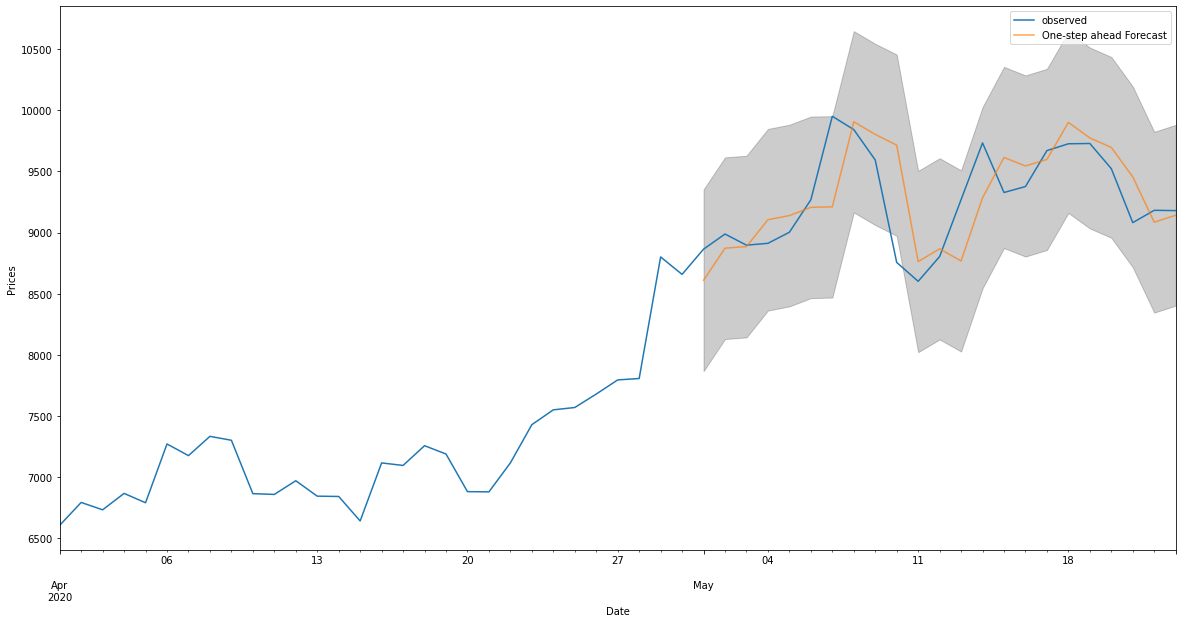

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2020-05-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = serie_predecir['2020-04':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(20, 10))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Prices')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_fore = pd.DataFrame(y_forecasted)

In [ ]:
y_fore = y_fore.rename(columns= {'predicted_mean':"Price Predict",})

In [ ]:
y_fore

,Price Predict
2020-05-01,8609.926630
2020-05-02,8872.803081
2020-05-03,8885.991676
2020-05-04,9105.424443
2020-05-05,9139.485275
2020-05-06,9206.684026
2020-05-07,9210.783130
2020-05-08,9906.557712
2020-05-09,9803.253002
2020-05-10,9715.332878


In [ ]:
y_truth= pd.DataFrame(serie_predecir['2020-05-01':])
y_truth

,Price
Date,
2020-05-01,8864.766602
2020-05-02,8988.596680
2020-05-03,8897.468750
2020-05-04,8912.654297
2020-05-05,9003.070313
2020-05-06,9268.761719
2020-05-07,9951.518555
2020-05-08,9842.666016
2020-05-09,9593.896484


In [ ]:
y_fore.shape

(23, 1)

In [ ]:
y_truth.shape

(23, 1)

In [ ]:
y_compare = y_truth.join(y_fore, on = 'Date')

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(y_truth, y_fore))

327.4281932939575

In [ ]:
results

In [ ]:
pred_uc = results.get_forecast(steps = 30)
pred_ci_ = pred_uc.predicted_mean 

In [ ]:
pred_ci_

2020-05-24     9451.105401
2020-05-25     9473.983134
2020-05-26     9561.626711
2020-05-27     9405.568328
2020-05-28     9607.086066
2020-05-29     9839.435686
2020-05-30    10070.693631
2020-05-31    10115.627956
2020-06-01    10063.694978
2020-06-02     9951.360446
2020-06-03     9958.426514
2020-06-04     9938.137460
2020-06-05    10231.860290
2020-06-06    10259.044024
2020-06-07    10357.573763
2020-06-08    10194.718662
2020-06-09    10419.306416
2020-06-10    10666.942809
2020-06-11    10924.738863
2020-06-12    10984.782325
2020-06-13    10939.781188
2020-06-14    10833.492814
2020-06-15    10845.197814
2020-06-16    10837.845711
2020-06-17    11153.663824
2020-06-18    11185.885956
2020-06-19    11296.034256
2020-06-20    11127.114835
2020-06-21    11375.505004
2020-06-22    11639.160569
Freq: D, Name: predicted_mean, dtype: float64

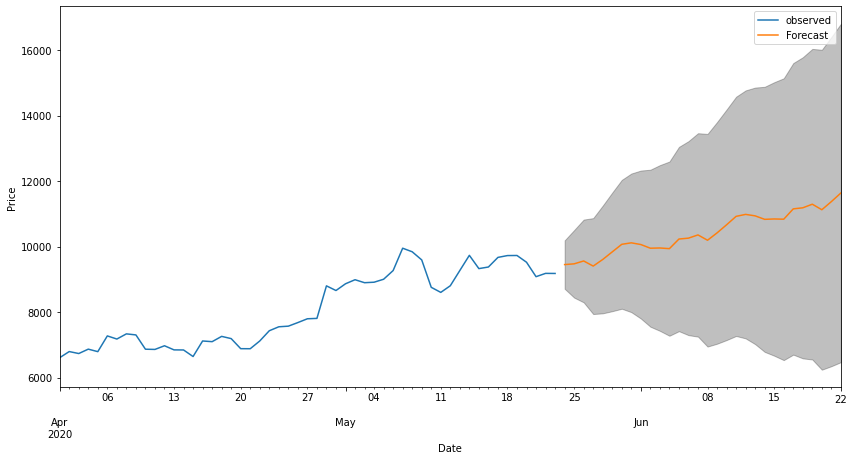

In [ ]:
pred_uc = results.get_forecast(steps = 30)
pred_ci = pred_uc.conf_int()
ax = serie_predecir['2020-04':].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()